Check the output of the data
- data structure
- if the halos are well matched
- if the halos matches the true halo lightcone data

**1. data structure**

In [1]:
import h5py

def h5ls(f):
    if type(f) == h5py._hl.dataset.Dataset:
        print(f, f[:10])
    else:
        print(f.keys())
        for key in f.keys():
            h5ls(f[key])

with h5py.File('./halo_crossing.hdf5', 'r') as f:
    h5ls(f)

<KeysViewHDF5 ['lightcone0000']>
<KeysViewHDF5 ['lightlike', 'spacelike']>
<KeysViewHDF5 ['Snapshot0071', 'Snapshot0072', 'Snapshot0073', 'Snapshot0074', 'Snapshot0075', 'Snapshot0076']>
<KeysViewHDF5 ['GalaxyID', 'M_fof', 'SOAPID', 'TopLeafID', 'Xcminpot_lc', 'Ycminpot_lc', 'Zcminpot_lc', 'redshift']>
<HDF5 dataset "GalaxyID": shape (0,), type "<i8"> []
<HDF5 dataset "M_fof": shape (0,), type "<f8"> []
<HDF5 dataset "SOAPID": shape (0,), type "<u8"> []
<HDF5 dataset "TopLeafID": shape (0,), type "<i8"> []
<HDF5 dataset "Xcminpot_lc": shape (0,), type "<f8"> []
<HDF5 dataset "Ycminpot_lc": shape (0,), type "<f8"> []
<HDF5 dataset "Zcminpot_lc": shape (0,), type "<f8"> []
<HDF5 dataset "redshift": shape (0,), type "<f8"> []
<KeysViewHDF5 ['GalaxyID', 'M_fof', 'SOAPID', 'TopLeafID', 'Xcminpot_lc', 'Ycminpot_lc', 'Zcminpot_lc', 'redshift']>
<HDF5 dataset "GalaxyID": shape (3,), type "<i8"> [135974427 698818851 685132246]
<HDF5 dataset "M_fof": shape (3,), type "<f8"> [1.23673798e+13 1.401

**2. halo matching**
- compare ID
- compare mass and coordinates

for all tests make sure do all snapshots

-0.034968287466389414 -0.0408266066951959


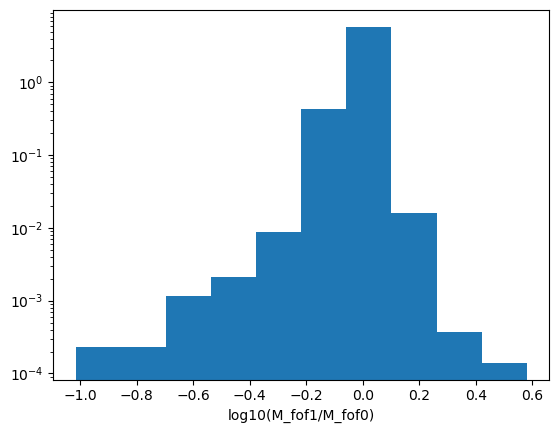

0.32046344713494634 0.9637371190413269


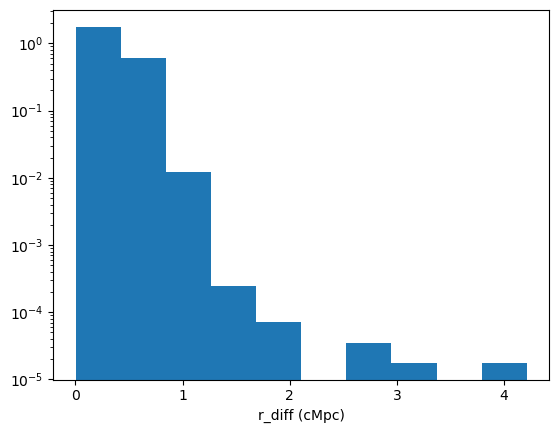

In [83]:
import numpy as np
qty0 = np.array([])
qty1 = np.array([])

x0 = np.array([])
y0 = np.array([])
z0 = np.array([])
x1 = np.array([])
y1 = np.array([])
z1 = np.array([])

with h5py.File('./halo_crossing.hdf5', 'r') as f:
    for snapnum in [77, 76, 75, 74, 73, 72]:
        massfof0 = f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/M_fof'][:]
        massfof1 = f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/M_fof'][:]
        qty0 = np.concatenate((qty0, massfof0))
        qty1 = np.concatenate((qty1, massfof1))
        
        x0 = np.concatenate((x0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Xcminpot_lc'][:]))
        y0 = np.concatenate((y0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Ycminpot_lc'][:]))
        z0 = np.concatenate((z0, f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/Zcminpot_lc'][:]))
        x1 = np.concatenate((x1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Xcminpot_lc'][:]))
        y1 = np.concatenate((y1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Ycminpot_lc'][:]))
        z1 = np.concatenate((z1, f[f'lightcone0000/lightlike/Snapshot{snapnum - 1:04d}/Zcminpot_lc'][:]))


import matplotlib.pyplot as plt
qty_diff = qty1 - qty0
print(np.median(qty_diff/qty0), np.mean(qty_diff/qty0))
plt.hist(np.log10(qty1/qty0), log=True, density=True)
# plt.hist(np.log10(qty0), log=True, histtype='step', density=True)
# plt.hist(np.log10(qty1), log=True, histtype='step', density=True)
plt.xlabel('log10(M_fof1/M_fof0)')
plt.show()

r_diff = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
print(np.median(r_diff), np.mean(r_diff))
plt.hist(r_diff[r_diff < 500], log=True, density=True)
plt.xlabel('r_diff (cMpc)')
plt.show()

**3. matching with true lightcone halo data**
- compare ID and snapnum

In [60]:
with h5py.File(f'/cosma8/data/dp004/jch/FLAMINGO/lightcone_halos/HYDRO_FIDUCIAL/lightcone_halos/lightcone0/lightcone_halos_0000.hdf5', 'r') as f:
    print(f['Subhalo'].keys())
    print(f['Subhalo/Mass_tot'][:])
    print(f['Subhalo/Mass_tot'].attrs.keys())
    print(f['Subhalo/Mass_tot'].attrs['Conversion factor to CGS (including cosmological corrections)'])
    print(f['Subhalo/Mass_tot'].attrs['Conversion factor to CGS (not including cosmological corrections)'])
    print(f['Subhalo/LightconeXcminpot'].attrs['a-scale exponent'])
    print(f['Subhalo/Xcminpot'].attrs['a-scale exponent'])
# >>> 1.98841e+43 # = 1e10 Msun

<KeysViewHDF5 ['ID', 'ID_mbp_bh', 'ID_tracer_bh', 'LightconeRedshift', 'LightconeXcminpot', 'LightconeXtracer_bh', 'LightconeYcminpot', 'LightconeYtracer_bh', 'LightconeZcminpot', 'LightconeZtracer_bh', 'Mass_bh', 'Mass_gas', 'Mass_star', 'Mass_tot', 'Redshift', 'SnapNum', 'Structuretype', 'Xcmbp_bh', 'Xcminpot', 'Xtracer_bh', 'Ycmbp_bh', 'Ycminpot', 'Ytracer_bh', 'Zcmbp_bh', 'Zcminpot', 'Ztracer_bh', 'n_bh']>
[ 48.72765   28.745783 362.89514  ...  47.743458  85.367676  38.090775]
<KeysViewHDF5 ['Conversion factor to CGS (including cosmological corrections)', 'Conversion factor to CGS (not including cosmological corrections)', 'U_I exponent', 'U_L exponent', 'U_M exponent', 'U_T exponent', 'U_t exponent', 'a-scale exponent', 'h-scale exponent']>
[1.98841e+43]
[1.98841e+43]
[0.]
[1.]


In [58]:
import h5py
for snapnum in [77, 76, 75, 74, 73]:
    lcnum = 77 - snapnum
    print(f'Snapshot{snapnum:04d}')
    with h5py.File(f'/cosma8/data/dp004/jch/FLAMINGO/lightcone_halos/HYDRO_FIDUCIAL/lightcone_halos/lightcone0/lightcone_halos_{lcnum:04d}.hdf5', 'r') as f:
        vrid = f['Subhalo/ID'][:]
        # print(f['Subhalo'].keys())
        mask = (f['Subhalo/Mass_tot'][:] > 1e3) & (f['Subhalo/Structuretype'][:] == 10)
        vrid = vrid[mask]
    print(len(vrid))

    with h5py.File('./halo_crossing.hdf5', 'r') as f:
        soapid0 = f[f'lightcone0000/spacelike/Snapshot{snapnum:04d}/SOAPID'][:]
        # soapid1 = f[f'lightcone0000/lightlike/Snapshot{snapnum:04d}/SOAPID'][:]
    print(len(soapid0))

    import numpy as np
    overlap0 = np.isin(soapid0+1, vrid)
    print(f'overlap with the spacelike snapshot: {np.sum(overlap0)}')
    print(f'ratio overlap to halo lightcone: {np.sum(overlap0)/len(vrid):.2%}') 
    print(f'ratio overlap to mock lightcone: {np.sum(overlap0)/len(soapid0):.2%}')

    # overlap1 = np.isin(soapid1+1, vrid)
    # print(f'overlap with the lightlike snapshot: {np.sum(overlap1)}')
    # print(f'percentage of halo found: {np.sum(overlap1)/len(vrid):.2%}') 

    # print(f'percentage of halo lightcone replicated: {(np.sum(overlap1)+np.sum(overlap0))/len(vrid):.2%} ')

Snapshot0077
898
6074
overlap with the spacelike snapshot: 773
ratio overlap to halo lightcone: 86.08%
ratio overlap to mock lightcone: 12.73% 
Snapshot0076
21509
39299
overlap with the spacelike snapshot: 13580
ratio overlap to halo lightcone: 63.14%
ratio overlap to mock lightcone: 34.56% 
Snapshot0075
74685
72281
overlap with the spacelike snapshot: 38694
ratio overlap to halo lightcone: 51.81%
ratio overlap to mock lightcone: 53.53% 
Snapshot0074
157042
16617
overlap with the spacelike snapshot: 14263
ratio overlap to halo lightcone: 9.08%
ratio overlap to mock lightcone: 85.83% 
Snapshot0073
256683
15
overlap with the spacelike snapshot: 15
ratio overlap to halo lightcone: 0.01%
ratio overlap to mock lightcone: 100.00% 
